In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
orders = pd.read_csv(r"C:\ML\archive (7)\blinkit_orders.csv")
order_items = pd.read_csv(r"C:\ML\archive (7)\blinkit_order_items.csv")

In [10]:
products = pd.read_csv(r"C:\ML\archive (7)\blinkit_products.csv")


In [11]:
customers = pd.read_csv(r"C:\ML\archive (7)\blinkit_customers.csv")
delivery = pd.read_csv(r"C:\ML\archive (7)\blinkit_delivery_performance.csv")
feedback = pd.read_csv(r"C:\ML\archive (7)\blinkit_customer_feedback.csv")
marketing = pd.read_csv(r"C:\ML\archive (7)\blinkit_marketing_performance.csv")

In [12]:
import pandas as pd

# Load data
orders = pd.read_csv(r"C:\ML\archive (7)\blinkit_orders.csv")
order_items = pd.read_csv(r"C:\ML\archive (7)\blinkit_order_items.csv")
products = pd.read_csv(r"C:\ML\archive (7)\blinkit_products.csv")

# 1. Convert 'order_date' to datetime
orders['order_date'] = pd.to_datetime(orders['order_date'], errors='coerce')  # errors='coerce' turns invalid dates to NaT

# 2. Handle missing values
# Optionally drop rows with missing order_date or product info
orders.dropna(subset=['order_date'], inplace=True)
products.fillna('Unknown', inplace=True)

# If 'order_total' has currency symbols, clean it
if orders['order_total'].dtype == 'object':
    orders['order_total'] = orders['order_total'].str.replace('₹', '').str.replace(',', '').astype(float)

# 3. Merge datasets
# Merge order_items with products on 'product_id'
merged_items = order_items.merge(products, on='product_id', how='left')

# Merge that with orders on 'order_id'
final_df = merged_items.merge(orders, on='order_id', how='left')

# Show cleaned data
final_df.head()


,order_id,product_id,quantity,unit_price,product_name,category,brand,price,mrp,margin_percentage,...,max_stock_level,customer_id,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id
0,1961864118,642612,3,517.03,Pet Treats,Pet Care,Pillay-Ahuja,517.03,795.43,35.0,...,57,30065862,2024-07-17 08:34:01,2024-07-17 08:52:01,2024-07-17 08:47:01,On Time,3197.07,Cash,63230,4771
1,1549769649,378676,1,881.42,Orange Juice,Cold Drinks & Juices,Baral-Kamdar,881.42,1259.17,30.0,...,65,9573071,2024-05-28 13:14:29,2024-05-28 13:25:29,2024-05-28 13:27:29,On Time,976.55,Cash,14983,7534
2,9185164487,741341,2,923.84,Eggs,Dairy & Breakfast,Prasad LLC,923.84,1154.80,20.0,...,62,45477575,2024-09-23 13:07:12,2024-09-23 13:25:12,2024-09-23 13:29:12,On Time,839.05,UPI,39859,9886
3,9644738826,561860,1,874.78,Orange Juice,Cold Drinks & Juices,Gupta Ltd,874.78,1249.69,30.0,...,90,88067569,2023-11-24 16:16:56,2023-11-24 16:34:56,2023-11-24 16:33:56,On Time,440.23,Card,61497,7917
4,5427684290,602241,2,976.55,Nuts,Snacks & Munchies,Bahl-Pau,976.55,1502.38,35.0,...,75,83298567,2023-11-20 05:00:39,2023-11-20 05:17:39,2023-11-20 05:18:39,On Time,2526.68,Cash,84315,2741


<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='month'>

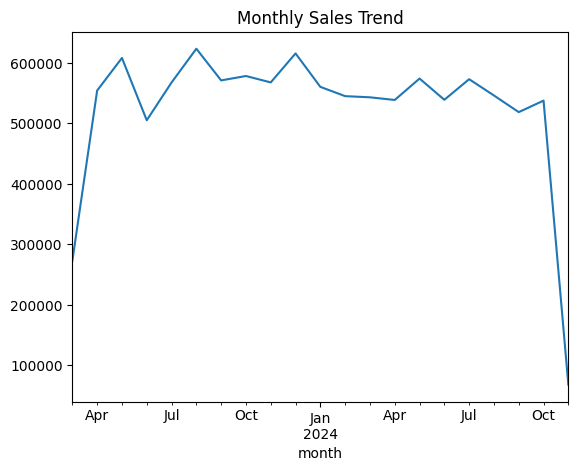

In [13]:
# Example: Monthly sales trend
orders['order_date'] = pd.to_datetime(orders['order_date'])
orders['month'] = orders['order_date'].dt.to_period('M')
monthly_sales = orders.groupby('month')['order_total'].sum()
monthly_sales.plot(kind='line', title='Monthly Sales Trend')